In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import OrderedDict

from run_model import run, draw_figure

In [2]:
from dataloader import read_bci_data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
# Load data
train_data, train_label, test_data, test_label = read_bci_data()

# Convert data type into float32
train_data  = torch.from_numpy(train_data).type(torch.float32)
train_label = torch.from_numpy(train_label).type(torch.long)
test_data   = torch.from_numpy(test_data).type(torch.float32)
test_label  = torch.from_numpy(test_label).type(torch.long)

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


## Implement DeepConvNet

In [4]:
from DeepConvNet import DeepConvNet

# Run Model

In [5]:

line_list = []
label_list = ['elu_train','elu_test','leaky_relu_train','leaky_relu_test','relu_train','relu_test']

# ELU
net = DeepConvNet().to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               , num_epochs = 300, batch_size = 64, print_freq = 100)
line_list.append(acc_train_list)
line_list.append(acc_test_list)

# Leaky_relu
net = DeepConvNet(act_f='leakyrelu').to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               , num_epochs = 300, batch_size = 64, print_freq = 100)
line_list.append(acc_train_list)
line_list.append(acc_test_list)

# Relu
net = DeepConvNet(act_f='relu').to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               ,num_epochs = 300, batch_size = 64, print_freq = 100)
line_list.append(acc_train_list)
line_list.append(acc_test_list)

epoch  100  : loss =  5.93085889518261
epoch  200  : loss =  2.155061143450439
epoch  300  : loss =  3.598099298775196
epoch  100  : loss =  7.62547767162323
epoch  200  : loss =  6.1762367486953735
epoch  300  : loss =  4.151774570345879
epoch  100  : loss =  7.397108376026154
epoch  200  : loss =  5.469315409660339
epoch  300  : loss =  5.3252904266119


# Draw loss & accuracy figures

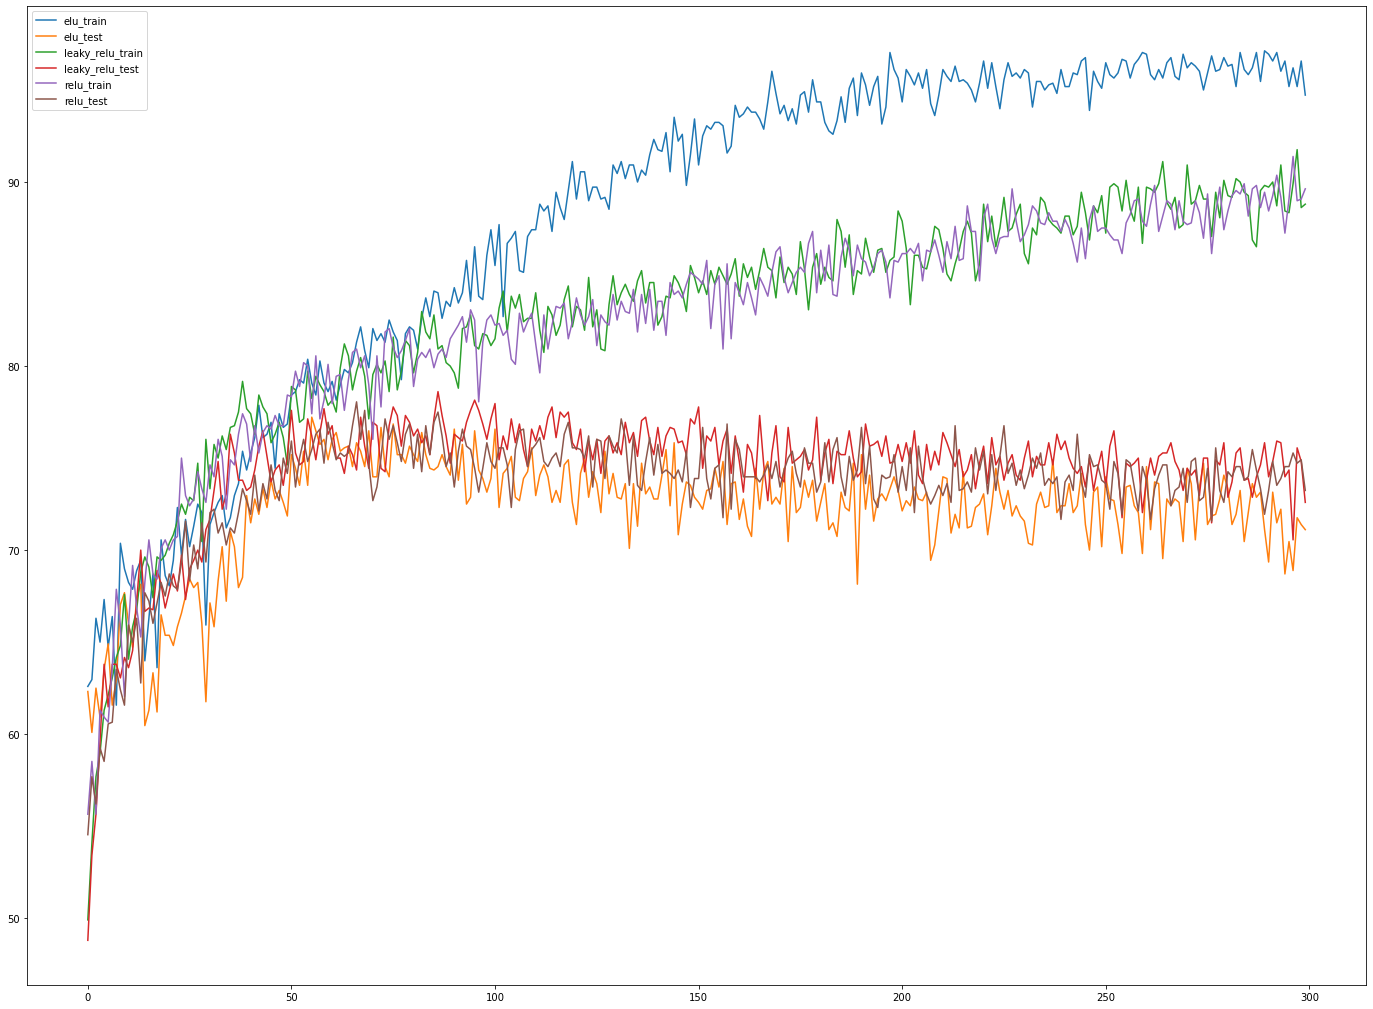

In [6]:
plt.figure(figsize=[24,18])
draw_figure(plt,line_list,label_list, loc='best')

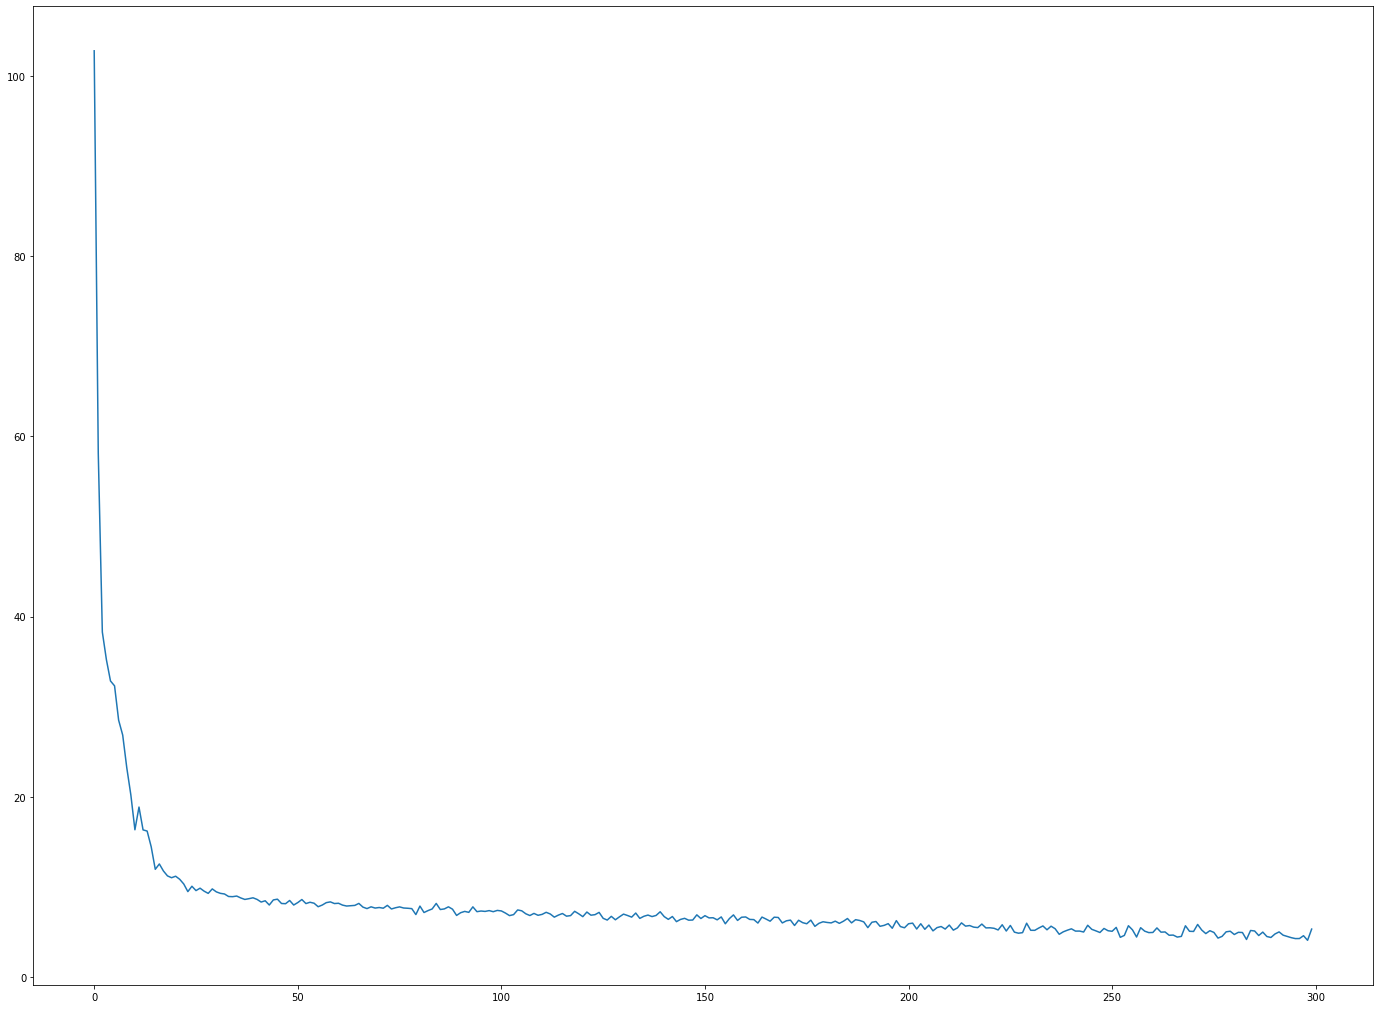

In [7]:
plt.figure(figsize=[24,18])
draw_figure(plt,[loss_list])